### ION Project

### 1. Create a random graph (ground truth)

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
import random
from igraph import *

##### One of the ways to create a random ground truth is buy using the networkx library and Digraph function

In [31]:
dag = nx.DiGraph()

In [32]:
dag.add_nodes_from(range(1, 10))

In [41]:
#The add edges function can be randomized with random edges in the range of the nodes
dag.add_edges_from([(1,4),(3,4),(5,7),(10, 9), (2, 3), (4,5), (6,8), (8,7), (7, 9)])

In [34]:
list(dag.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

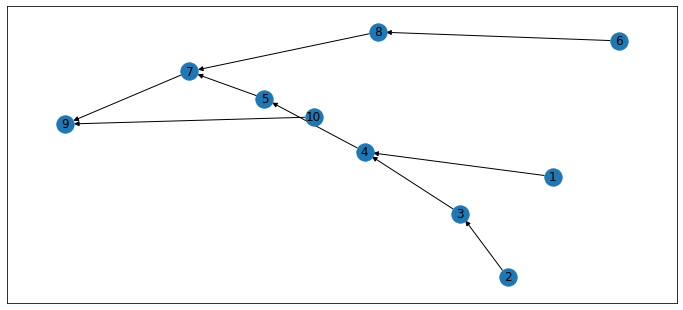

In [36]:
plt.figure(figsize = (12, 12))
plt.subplot(211)
nx.draw_networkx(dag)

In [37]:
nx.is_directed_acyclic_graph(dag)

True

##### One of the things ION needs us to do is to form the subgraphs with causal connections and overlapping. The example of causal connections and overlapping can be found in the doc. The networkx does not give to form the subgraphs with causal connections and overlapping. 

In [38]:
sub_graph1 = dag.subgraph([1, 4, 5, 14, 3])

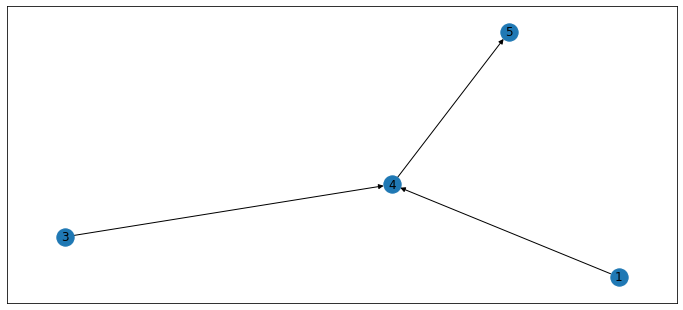

In [39]:
plt.figure(figsize = (12, 12))
plt.subplot(211)
nx.draw_networkx(sub_graph1)

In [11]:
sub_graph2 = dag.subgraph([1, 4, 14, 3, 18, 16])

In [12]:
nx.is_directed_acyclic_graph(sub_graph2)

True

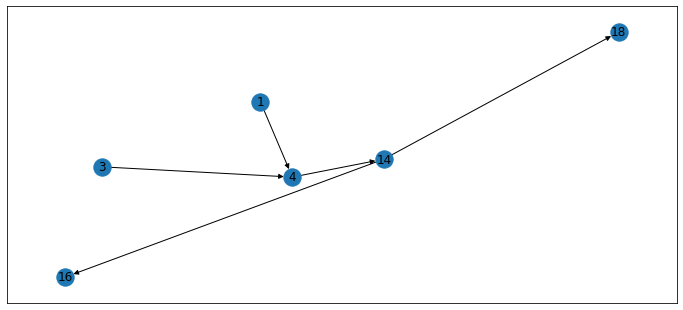

In [13]:
plt.figure(figsize = (12, 12))
plt.subplot(211)
nx.draw_networkx(sub_graph2)

In [14]:
sub_graph3 = dag.subgraph([10, 6, 19, 13, 11, 16])

In [15]:
nx.is_directed_acyclic_graph(sub_graph3)

True

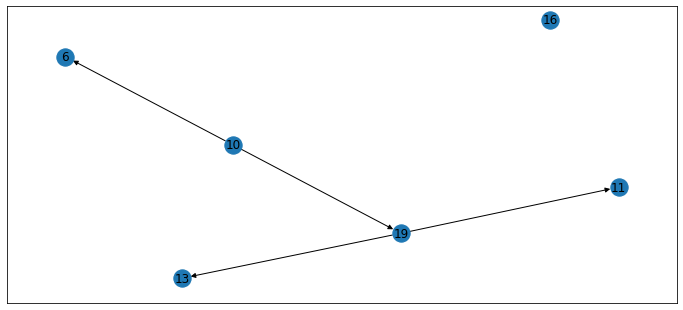

In [16]:
plt.figure(figsize = (12, 12))
plt.subplot(211)
nx.draw_networkx(sub_graph3)

##### From here on there is prcoessing that is performed to get the subgraphs with causal connections and overlapping. This part of the code also includes the processing to be applied to get the clingo input generated. 

In [44]:
allEdges = dag.edges()

In [45]:
print(allEdges)

[(1, 4), (2, 3), (3, 4), (4, 5), (5, 7), (6, 8), (7, 9), (8, 7), (10, 9)]


##### This is the code to generate the clingo input, it also has few more print statements than required by the clingo input. 

[1, 3, 4, 5, 14]
varin (1, 1) .
varin (1, 3) .
varin (1, 4) .
varin (1, 5) .
varin (1, 14) .
[(1, 4), (3, 4), (4, 5), (4, 14)]
edge (1, 4, 1) .
edge (3, 4, 1) .
edge (4, 5, 1) .
edge (4, 14, 1) .
nedge (1, 3, 1) .
nedge (1, 5, 1) .
nedge (1, 14, 1) .
nedge (3, 5, 1) .
nedge (3, 14, 1) .
nedge (5, 14, 1) .
nedge (4, 1, 1) .
nedge (4, 3, 1) .
nedge (5, 4, 1) .
nedge (14, 4, 1) .
[(1, 3), (1, 5), (1, 14), (3, 5), (3, 14), (5, 14), (4, 1), (4, 3), (5, 4), (14, 4)]
[1, 3, 4, 14, 16, 18]
varin (2, 1) .
varin (2, 3) .
varin (2, 4) .
varin (2, 14) .
varin (2, 16) .
varin (2, 18) .
[(1, 4), (3, 4), (4, 14), (14, 18), (14, 16)]
edge (1, 4, 2) .
edge (3, 4, 2) .
edge (4, 14, 2) .
edge (14, 18, 2) .
edge (14, 16, 2) .
nedge (1, 3, 2) .
nedge (1, 14, 2) .
nedge (1, 16, 2) .
nedge (1, 18, 2) .
nedge (3, 14, 2) .
nedge (3, 16, 2) .
nedge (3, 18, 2) .
nedge (4, 16, 2) .
nedge (4, 18, 2) .
nedge (16, 18, 2) .
nedge (4, 1, 2) .
nedge (4, 3, 2) .
nedge (14, 4, 2) .
nedge (16, 14, 2) .
nedge (18, 14, 2) .

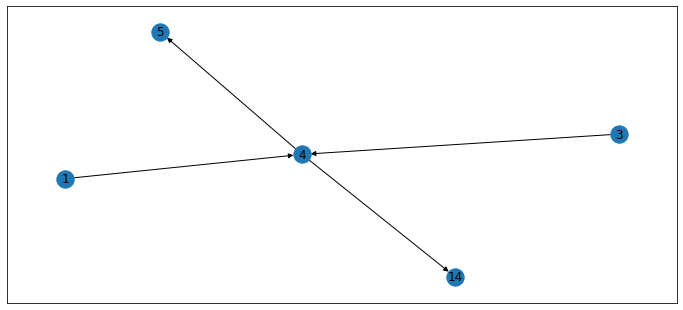

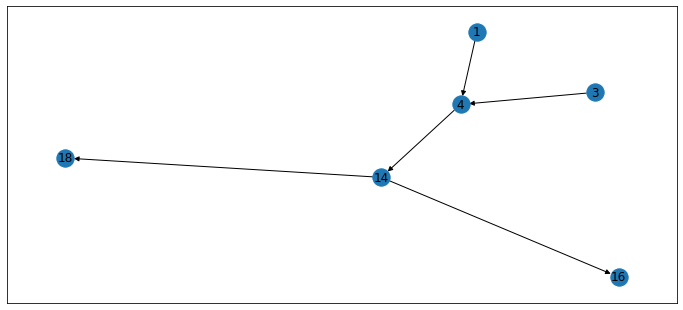

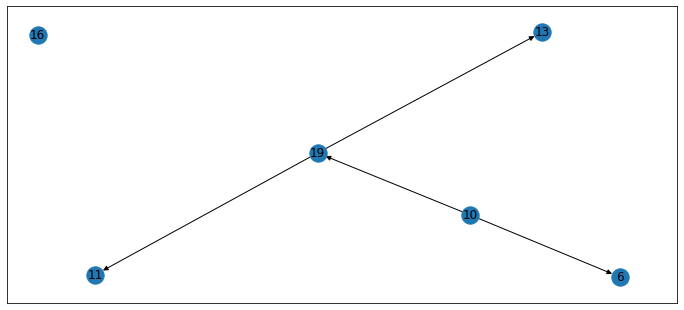

In [37]:
#How many graphs do you want to test this algorithm on? 

n = 3  #Number of graphs requested. 

for i in range(1, n+1):
    g = createGraph(i)
    nodes = getNodes(g)
    print(nodes)
    
    for n in nodes:
        print("varin",(i,n),".")
    edge = getPresentEdges(g)
    print (edge)
    outputPresentEdges = []
    for (a,b) in edge:
        print("edge",(a,b,i),".")
    nedge = getAbsentEdges(nodes, edge)
    
    for (a,b) in nedge:
        print("nedge",(a,b,i),".")
    print (nedge)

In [21]:
def getNodes(g):
    nodeList = []
    nodeList = list(g.nodes())
    return nodeList

In [23]:
def getPresentEdges(g):
    presentEdges = []

    for a, b in g.edges():
        presentEdges.append((a,b))
    return presentEdges

In [24]:
def getAbsentEdges(nodeList, presentEdges):
    absentEdges = []
    res1 = [(a, b) for idx, a in enumerate(nodeList) for b in nodeList[idx + 1:]] 
    res2 = [(b, a) for idx, a in enumerate(nodeList) for b in nodeList[idx + 1:]] 
    possibleEdges = res1 + res2
    for a, b in possibleEdges:
        if (a,b) not in presentEdges and a in nodeList and b in nodeList and (b, a) not in absentEdges:
            absentEdges.append((a,b))
    absentEdges = list(dict.fromkeys(absentEdges))
    return absentEdges

From here starts the part of the code required for creating the connected subgraphs

In [25]:
nodessub1 = random.sample(list(dag.nodes), 12)

In [26]:
subtemp = dag.subgraph(nodessub1)

In [27]:
nx.is_directed_acyclic_graph(subtemp)

True

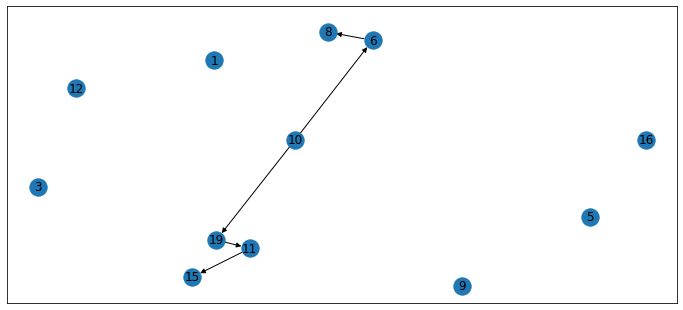

In [28]:
plt.figure(figsize = (12, 12))
plt.subplot(211)
nx.draw_networkx(subtemp)

In [29]:
import itertools

In [30]:
for pair in itertools.combinations(nodessub1,12):
    print (pair)

(12, 1, 9, 6, 10, 19, 5, 8, 15, 3, 16, 11)


In [31]:
nodessub2 = random.sample(list(dag.nodes), 12)

In [32]:
subtemp2 = dag.subgraph(nodessub2)

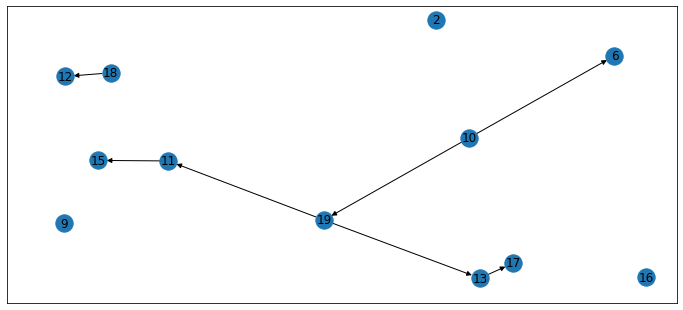

In [33]:
plt.figure(figsize = (12, 12))
plt.subplot(211)
nx.draw_networkx(subtemp2)

In [34]:
sub2edgelist = []

In [35]:
for pair in itertools.combinations(nodessub2,2):
    sub2edgelist.append(pair)

In [36]:
indegrees = []
outdegrees = []
for pair in sub2edgelist: 
    print (pair[1])
    indegrees.insert(pair[1], 1) 
    print (pair[0])
    outdegrees.insert(pair[0], 1) 

10
2
16
2
19
2
9
2
11
2
13
2
12
2
18
2
17
2
6
2
15
2
16
10
19
10
9
10
11
10
13
10
12
10
18
10
17
10
6
10
15
10
19
16
9
16
11
16
13
16
12
16
18
16
17
16
6
16
15
16
9
19
11
19
13
19
12
19
18
19
17
19
6
19
15
19
11
9
13
9
12
9
18
9
17
9
6
9
15
9
13
11
12
11
18
11
17
11
6
11
15
11
12
13
18
13
17
13
6
13
15
13
18
12
17
12
6
12
15
12
17
18
6
18
15
18
6
17
15
17
15
6


In [96]:
def ER(n, p):
    V = set([v for v in range(n)])
    E = set()
    for combination in combinations(V, 2):
        a = random()
        if a < p:
            E.add(combination)

    g = nx.Graph()
    g.add_nodes_from(V)
    g.add_edges_from(E)

    return g

In [98]:
nodeList = list(g.nodes())

In [99]:
presentEdges

[(1, 2), (2, 3)]

In [100]:
absentEdges

[(2, 1), (3, 2)]

In [101]:
res1 = [(a, b) for idx, a in enumerate(nodeList) for b in nodeList[idx + 1:]] 

In [102]:
res2 = [(b, a) for idx, a in enumerate(nodeList) for b in nodeList[idx + 1:]] 

In [103]:
res1

[(1, 2), (1, 3), (2, 3)]

In [104]:
res2

[(2, 1), (3, 1), (3, 2)]

In [105]:
allEdges = res1 + res2

In [106]:
allEdges

[(1, 2), (1, 3), (2, 3), (2, 1), (3, 1), (3, 2)]

In [107]:
for a, b in allEdges:
    if (a,b) not in presentEdges:
        absentEdges.append((a,b))
absentEdges = list(dict.fromkeys(absentEdges))
print(absentEdges)

[(2, 1), (3, 2), (1, 3), (3, 1)]


In [ ]:
for (a,b) in presentEdges:
    

In [74]:
absentEdges

[(2, 1),
 (4, 1),
 (5, 1),
 (3, 2),
 (4, 3),
 (1, 3),
 (2, 4),
 (2, 5),
 (3, 5),
 (4, 5),
 (3, 1),
 (4, 2),
 (5, 2),
 (5, 3),
 (5, 4)]

In [ ]:
print([random.randint(0, 10) for i in range(5)])
# [8, 5, 7, 10, 7]


In [ ]:
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(3, 4)
g.add_edge(1, 4)
g.add_edge(1, 5)

In [39]:
#Create a random graph 

#New Process of creating graph

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
from random import random
from igraph import *
from random import sample

In [2]:
n = 20
p = 0.2
G = ER(n, p)
pos = nx.spring_layout(G)

nx.draw_networkx(G, pos)
nx.is_directed_acyclic_graph(G)
plt.title("Random Graph Generation")
plt.show()

NameError: name 'ER' is not defined

In [5]:
nx.is_directed_acyclic_graph(G)

True

In [13]:
allEdges = G.edges()

In [14]:
print (allEdges)

[(0, 14), (0, 11), (0, 1), (0, 7), (1, 3), (1, 12), (1, 4), (1, 16), (2, 17), (2, 7), (3, 10), (3, 13), (3, 6), (3, 17), (4, 6), (4, 15), (4, 11), (6, 18), (6, 15), (6, 10), (7, 8), (7, 14), (8, 12), (8, 18), (8, 16), (9, 11), (9, 16), (10, 18), (10, 15), (12, 19), (12, 18), (12, 17), (13, 17), (13, 19), (14, 16), (14, 17), (15, 18), (16, 18), (17, 18), (18, 19)]


In [15]:
allNodes = G.nodes()

In [16]:
print (allNodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


12


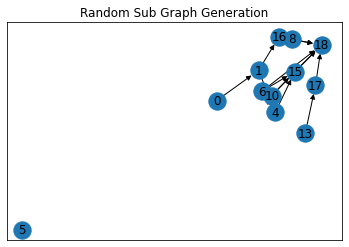

[0, 1, 4, 5, 6, 8, 10, 13, 15, 16, 17, 18]
varin (1, 0) .
varin (1, 1) .
varin (1, 4) .
varin (1, 5) .
varin (1, 6) .
varin (1, 8) .
varin (1, 10) .
varin (1, 13) .
varin (1, 15) .
varin (1, 16) .
varin (1, 17) .
varin (1, 18) .
[(0, 1), (1, 4), (1, 16), (4, 6), (4, 15), (6, 18), (6, 15), (6, 10), (8, 18), (8, 16), (10, 18), (10, 15), (13, 17), (15, 18), (16, 18), (17, 18)]
edge (0, 1, 1) .
edge (1, 4, 1) .
edge (1, 16, 1) .
edge (4, 6, 1) .
edge (4, 15, 1) .
edge (6, 18, 1) .
edge (6, 15, 1) .
edge (6, 10, 1) .
edge (8, 18, 1) .
edge (8, 16, 1) .
edge (10, 18, 1) .
edge (10, 15, 1) .
edge (13, 17, 1) .
edge (15, 18, 1) .
edge (16, 18, 1) .
edge (17, 18, 1) .
nedge (0, 4, 1) .
nedge (0, 5, 1) .
nedge (0, 6, 1) .
nedge (0, 8, 1) .
nedge (0, 10, 1) .
nedge (0, 13, 1) .
nedge (0, 15, 1) .
nedge (0, 16, 1) .
nedge (0, 17, 1) .
nedge (0, 18, 1) .
nedge (1, 5, 1) .
nedge (1, 6, 1) .
nedge (1, 8, 1) .
nedge (1, 10, 1) .
nedge (1, 13, 1) .
nedge (1, 15, 1) .
nedge (1, 17, 1) .
nedge (1, 18, 1)

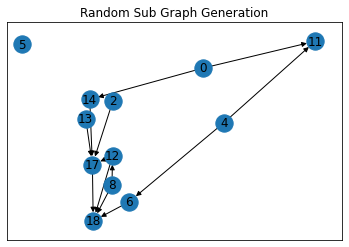

[0, 2, 4, 5, 6, 8, 11, 12, 13, 14, 17, 18]
varin (2, 0) .
varin (2, 2) .
varin (2, 4) .
varin (2, 5) .
varin (2, 6) .
varin (2, 8) .
varin (2, 11) .
varin (2, 12) .
varin (2, 13) .
varin (2, 14) .
varin (2, 17) .
varin (2, 18) .
[(0, 14), (0, 11), (2, 17), (4, 6), (4, 11), (6, 18), (8, 12), (8, 18), (12, 18), (12, 17), (13, 17), (14, 17), (17, 18)]
edge (0, 14, 2) .
edge (0, 11, 2) .
edge (2, 17, 2) .
edge (4, 6, 2) .
edge (4, 11, 2) .
edge (6, 18, 2) .
edge (8, 12, 2) .
edge (8, 18, 2) .
edge (12, 18, 2) .
edge (12, 17, 2) .
edge (13, 17, 2) .
edge (14, 17, 2) .
edge (17, 18, 2) .
nedge (0, 2, 2) .
nedge (0, 4, 2) .
nedge (0, 5, 2) .
nedge (0, 6, 2) .
nedge (0, 8, 2) .
nedge (0, 12, 2) .
nedge (0, 13, 2) .
nedge (0, 17, 2) .
nedge (0, 18, 2) .
nedge (2, 4, 2) .
nedge (2, 5, 2) .
nedge (2, 6, 2) .
nedge (2, 8, 2) .
nedge (2, 11, 2) .
nedge (2, 12, 2) .
nedge (2, 13, 2) .
nedge (2, 14, 2) .
nedge (2, 18, 2) .
nedge (4, 5, 2) .
nedge (4, 8, 2) .
nedge (4, 12, 2) .
nedge (4, 13, 2) .
nedg

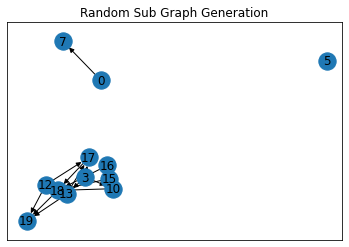

[0, 3, 5, 7, 10, 12, 13, 15, 16, 17, 18, 19]
varin (3, 0) .
varin (3, 3) .
varin (3, 5) .
varin (3, 7) .
varin (3, 10) .
varin (3, 12) .
varin (3, 13) .
varin (3, 15) .
varin (3, 16) .
varin (3, 17) .
varin (3, 18) .
varin (3, 19) .
[(0, 7), (3, 10), (3, 13), (3, 17), (10, 18), (10, 15), (12, 19), (12, 18), (12, 17), (13, 17), (13, 19), (15, 18), (16, 18), (17, 18), (18, 19)]
edge (0, 7, 3) .
edge (3, 10, 3) .
edge (3, 13, 3) .
edge (3, 17, 3) .
edge (10, 18, 3) .
edge (10, 15, 3) .
edge (12, 19, 3) .
edge (12, 18, 3) .
edge (12, 17, 3) .
edge (13, 17, 3) .
edge (13, 19, 3) .
edge (15, 18, 3) .
edge (16, 18, 3) .
edge (17, 18, 3) .
edge (18, 19, 3) .
nedge (0, 3, 3) .
nedge (0, 5, 3) .
nedge (0, 10, 3) .
nedge (0, 12, 3) .
nedge (0, 13, 3) .
nedge (0, 15, 3) .
nedge (0, 16, 3) .
nedge (0, 17, 3) .
nedge (0, 18, 3) .
nedge (0, 19, 3) .
nedge (3, 5, 3) .
nedge (3, 7, 3) .
nedge (3, 12, 3) .
nedge (3, 15, 3) .
nedge (3, 16, 3) .
nedge (3, 18, 3) .
nedge (3, 19, 3) .
nedge (5, 7, 3) .
nedg

In [37]:
#How many number of subgraphs do you need? 

n = 3
randomSampleNumber = int(len(allNodes)/2 + 2)

print(randomSampleNumber)

for i in range(1, n+1):
    randomSubGraphNodeList = sample(list(G.nodes),randomSampleNumber)
    randomSubGraph = G.subgraph(randomSubGraphNodeList)
    nx.draw_networkx(randomSubGraph)
    nx.is_directed_acyclic_graph(randomSubGraph)
    plt.title("Random Sub Graph Generation")
    plt.show()
    nodes = getNodes(randomSubGraph)
    print(nodes)
    for n in nodes:
        print("varin",(i,n),".")
    edge = getPresentEdges(randomSubGraph)
    print (edge)
    outputPresentEdges = []
    for (a,b) in edge:
        print("edge",(a,b,i),".")
        
    nedge = getAbsentEdges(nodes, edge)
    for (a,b) in nedge:
        print("nedge",(a,b,i),".")
    print (nedge)

In [6]:
nodessub1 = sample(list(G.nodes), 12)

In [7]:
subtemp1 = G.subgraph(nodessub1)

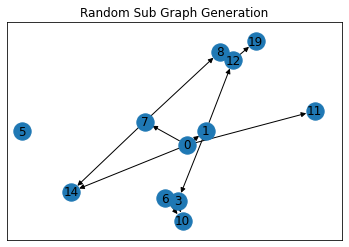

In [8]:
nx.draw_networkx(subtemp1)
nx.is_directed_acyclic_graph(G)
plt.title("Random Sub Graph Generation")
plt.show()

In [9]:
nodessub2 = sample(list(G.nodes), 12)

In [10]:
subtemp2 = G.subgraph(nodessub2)

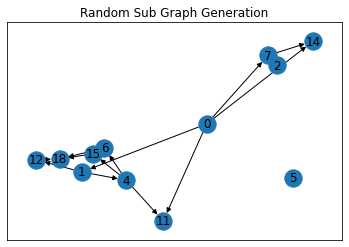

In [11]:
nx.draw_networkx(subtemp2)
nx.is_directed_acyclic_graph(G)
plt.title("Random Sub Graph Generation")
plt.show()

In [ ]:
n = 3  #Number of graphs requested. 

for i in range(1, n+1):
    
    nodes = getNodes(g)
    print(nodes)
    
    for n in nodes:
        print("varin",(i,n),".")
    edge = getPresentEdges(g)
    print (edge)
    outputPresentEdges = []
    for (a,b) in edge:
        print("edge",(a,b,i),".")
        
    nedge = getAbsentEdges(nodes, edge)
    
    for (a,b) in nedge:
        print("nedge",(a,b,i),".")
    print (nedge)

In [26]:
def getNodes(g):
    nodeList = []
    nodeList = list(g.nodes())
    return nodeList

In [32]:
def getPresentEdges(g):
    presentEdges = []

    for a, b in g.edges():
        presentEdges.append((a,b))
    return presentEdges

In [36]:
def getAbsentEdges(nodeList, presentEdges):
    absentEdges = []
    res1 = [(a, b) for idx, a in enumerate(nodeList) for b in nodeList[idx + 1:]] 
    res2 = [(b, a) for idx, a in enumerate(nodeList) for b in nodeList[idx + 1:]] 
    possibleEdges = res1 + res2
    for a, b in possibleEdges:
        if (a,b) not in presentEdges and a in nodeList and b in nodeList and (b, a) not in absentEdges:
            absentEdges.append((a,b))
    absentEdges = list(dict.fromkeys(absentEdges))
        
    for a, b in possibleEdges:
        if (a,b) in presentEdges and (b,a) in absentEdges:
            absentEdges.remove((b,a))
    return absentEdges

In [40]:
### Script to test the clingo output

In [10]:
from random import sample

In [11]:
randomSampleOutput = sample(clingoOutput,2)

In [12]:
randomSampleOutput

['edge(2,1) edge(8,1) edge(3,2) edge(5,3) edge(3,4) edge(2,6) edge(3,6) edge(4,6) edge(4,7) edge(8,7) edge(7,9) edge(9,10)',
 'edge(2,1) edge(3,2) edge(5,3) edge(3,4) edge(2,6) edge(3,6) edge(4,6) edge(5,6) edge(4,7) edge(8,7) edge(7,9) edge(9,10)']

In [18]:
for str in randomSampleOutput: 
    edgeSampleList = str.split()
    for i in edgeSampleList:
        if i in allEdges:
            continue

In [66]:
import re
# Function to parse clingo output
def parse_clingo_output(output_file):
    results = []
    
    with open(output_file, 'r') as f:
        for line in f:
            answer = []
            if line.startswith('Answer'):
                ans = next(f)
                print(ans)
                answer = ans.split(" ")
                print (answer)
            if answer: 
                results.append(answer)
    return results

output_file = 'clingo_output.txt'
results = parse_clingo_output(output_file)
print(results)

edge(2,1) edge(3,2) edge(5,3) edge(3,4) edge(4,6) edge(4,7) edge(8,7) edge(7,9) edge(9,10)

['edge(2,1)', 'edge(3,2)', 'edge(5,3)', 'edge(3,4)', 'edge(4,6)', 'edge(4,7)', 'edge(8,7)', 'edge(7,9)', 'edge(9,10)\n']
[['edge(2,1)', 'edge(3,2)', 'edge(5,3)', 'edge(3,4)', 'edge(4,6)', 'edge(4,7)', 'edge(8,7)', 'edge(7,9)', 'edge(9,10)\n']]


In [22]:
import networkx as nx

# Create a random graph
graph = nx.DiGraph()
graph.add_edges_from([(1, 2), (2, 3), (3, 'D'), ('D', 'E'), ('E', 'F')])

# Add an additional edge between A and C
#graph.add_edge('A', 'C')

# Create a subgraph of the partial ancestral graph
pag_nodes = ['A', 'C', 'D', 'F']  # nodes in the partial ancestral graph
pag_subgraph = nx.induced_subgraph(graph, pag_nodes)

# Print the edges in the subgraph
print(pag_subgraph.edges())

[('C', 'D')]


In [111]:
from collections import deque

In [113]:
def BFS(componentNum, src):
     
    global visited, adj
    queue = deque()
 
    queue.append(src)
    visited[src] = 1
    reachableNodes = []
    while (len(queue) > 0):
        u = queue.popleft()
        reachableNodes.append(u)
        for itr in adj[u]:
            if (visited[itr] == 0):
                visited[itr] = 1
                queue.append(itr)
 
    return reachableNodes

In [115]:
def findReachableNodes(arr, n):
    global V, adj, visited
    a = []
    componentNum = 0
    for i in range(n):
        u = arr[i]
        if (visited[u] == 0):
            componentNum += 1
            a = BFS(componentNum, u)
        print("Reachable Nodes from ", u, " are")
        displayReachableNodes(a)

In [116]:
# Driver code
if __name__ == '__main__':
     
    V = 7
    adj = [[] for i in range(V + 1)]
    visited = [0 for i in range(V + 1)]
    addEdge(1, 2)
    addEdge(2, 3)
    addEdge(3, 4)
    addEdge(5, 6)
    addEdge(5, 7)

    arr = [1, 4, 5]
    n = len(arr)
 
    findReachableNodes(arr, n)

Reachable Nodes from  1  are
1 2 3 4 
[1, 2, 3, 4]
[[1, 2, 3, 4]]
Reachable Nodes from  4  are
1 2 3 4 
[1, 2, 3, 4]
[[1, 2, 3, 4], [1, 2, 3, 4]]
Reachable Nodes from  5  are
5 6 7 
[5, 6, 7]
[[1, 2, 3, 4], [1, 2, 3, 4], [5, 6, 7]]


In [117]:
finalList

[[1, 2, 3, 4], [1, 2, 3, 4], [5, 6, 7]]

In [118]:
arr = [1, 4, 5]

In [138]:
getPagedges(arr, finalList)

[(1, 4)]


In [137]:
def getPagedges(arr, finalList):
    final_result = []
    for i in range(0, len(arr)):
        vertex = arr[i]
        reachList = finalList[i]
        result = [(a, b) for idx, a in enumerate(reachList) for b in reachList[idx + 1:]] 
        output = []
        for pair in result:
            if pair[0] == vertex or pair[1] == vertex:
                output.append(pair)
        for a,b in output:
            if a in arr and b in arr and (a,b) not in final_result:
                final_result.append((a,b))
    print(final_result)

In [160]:
import networkx as nx

In [161]:
G = nx.Graph()

In [162]:
G.add_edges_from([(1, 2), (2,3),(3,4),(5,6),(5,7)])

In [163]:
nx.shortest_path(G, source=1, target=4)

[1, 2, 3, 4]

In [144]:
path = [1, 2, 3, 4]

In [145]:
arr = [1, 4, 5]

In [152]:
source = 1
target = 4

In [154]:
for i in path:
    if i != source and i != target and i not in arr:
        continue
    else:
        path.remove(i)

In [155]:
path

[2, 3]

In [200]:
pathsd = nx.all_simple_paths(G, source=1, target=4)

In [201]:
lipathsd = list(pathsd)
lipathsd

[[1, 2, 3, 4]]

In [203]:
for i in lipathsd:
    print (i)
    for j in i :
        if j  != source and j != target:
            continue
        else:
            print (j)
            i.remove(j)

[1, 2, 3, 4]
1
4


In [204]:
lipathsd

[[2, 3]]

In [206]:
for li in lipathsd:
    if li == path:
        print ("True")
    else:
        print ("False")

True


In [40]:
arr = [1,4,5]

In [58]:
reach1 = [1,2,3,4]
node = 1

In [71]:
res1 = [(a, b) for idx, a in enumerate(reach1) for b in reach1[idx + 1:]] 
print (res1)
output = []
for i in res1:
    if i[0] == node or i[1] == node:
        print (i)
        output.append(i)
        

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
(1, 2)
(1, 3)
(1, 4)


In [72]:
output

[(1, 2), (1, 3), (1, 4)]

In [66]:
res1

[(1, 2), (1, 3), (1, 4), (2, 4)]

In [54]:
res1

[(1, 3), (2, 3), (3, 4)]

In [48]:
res1

[(1, 3), (2, 3), (3, 4)]

In [39]:
res1

[(1, 3), (2, 3), (3, 4)]

In [73]:
for a,b in output:
    if b in arr:
        output.remove((a,b))

In [74]:
output

[(1, 2), (1, 3)]

In [2]:
#Complete New Integration

In [3]:
# 1.Create a random graph
# 2. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
from random import random
from igraph import *
from random import sample

In [4]:
def ER(n, p):
    V = set([v for v in range(n)])
    E = set()
    for combination in combinations(V, 2):
        a = random()
        if a < p:
            E.add(combination)

    g = nx.Graph()
    g.add_nodes_from(V)
    g.add_edges_from(E)
    return g

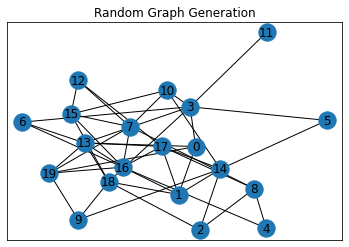

In [5]:
n = 20
p = 0.2
G = ER(n, p)
pos = nx.spring_layout(G)

nx.draw_networkx(G, pos)
nx.is_directed_acyclic_graph(G)
plt.title("Random Graph Generation")
plt.show()

In [6]:
nx.is_directed_acyclic_graph(G)

False

In [7]:
allEdges = G.edges()

In [8]:
allNodes = G.nodes()

In [ ]:
#How many number of subgraphs do you need? 

n = 3
randomSampleNumber = int(len(allNodes)/2 + 2)

print(randomSampleNumber)

for i in range(1, n+1):
    randomSubGraphNodeList = sample(list(G.nodes),randomSampleNumber)
    randomSubGraph = G.subgraph(randomSubGraphNodeList)
    nx.draw_networkx(randomSubGraph)
    
    nx.is_directed_acyclic_graph(randomSubGraph)
    plt.title("Random Sub Graph Generation")
    plt.show()
    nodes = getNodes(randomSubGraph)
    print(nodes)
    for n in nodes:
        print("varin",(i,n),".")
    edge = getPresentEdges(randomSubGraph)
    print (edge)
    outputPresentEdges = []
    for (a,b) in edge:
        print("edge",(a,b,i),".")
        
    nedge = getAbsentEdges(nodes, edge)
    for (a,b) in nedge:
        print("nedge",(a,b,i),".")
    print (nedge)

In [9]:
#Getting direct and indirect edges and then removing them

In [10]:
def addEdge(v, w):
    global visited, adj
    adj[v].append(w)
    adj[w].append(v)

In [11]:
def BFS(componentNum, src):
     
    global visited, adj
    queue = deque()
 
    queue.append(src)
    visited[src] = 1
    reachableNodes = []
    while (len(queue) > 0):
        u = queue.popleft()
        reachableNodes.append(u)
        for itr in adj[u]:
            if (visited[itr] == 0):
                visited[itr] = 1
                queue.append(itr)
 
    return reachableNodes

In [12]:
finalList = []
def displayReachableNodes(m):
    nodes = []
    for i in m:
        nodes.append(i)
        print(i, end = " ")
 
    print()
    finalList.append(nodes)
    print (nodes)
    print(finalList)

In [13]:
def findReachableNodes(arr, n):
    global V, adj, visited
    a = []
    componentNum = 0
    for i in range(n):
        u = arr[i]
        if (visited[u] == 0):
            componentNum += 1
            a = BFS(componentNum, u)
        print("Reachable Nodes from ", u, " are")
        displayReachableNodes(a)

In [15]:
def getPagEdges(allNodes, alledges, nodes):
    V = len(allNodes)
    adj = [[] for i in range(V + 1)]
    visited = [0 for i in range(V + 1)]
    
    for e in allEdges:
        addEge(e)

    arr = nodes
    n = len(nodes)
 
    findReachableNodes(arr, n)

In [1]:
#Plot the graphs

In [4]:
# #Sample input created. 
# edge (4, 6, 2) .
# edge (4, 7, 2) .
# edge (8, 7, 2) .
# edge (7, 9, 2) .
# edge (9, 10, 2) .

# edge (2, 1, 1) .
# edge (3, 2, 1) .
# edge (3, 4, 1) .
# edge (5, 3, 1) .

# nedge (1, 3, 1) .
# nedge (1, 5, 1) .
# nedge (1, 4, 1) .
# nedge (4, 1, 1) .
# nedge (3, 1, 1) .
# nedge (5, 1, 1) .
# nedge (5, 2, 1) .
# nedge (5, 4, 1) .
# nedge (2, 5, 1) .
# nedge (4, 5, 1) .
# nedge (4, 2, 1) .
# nedge (2, 4, 1) .
# nedge (1, 6, 2) .
# nedge (1, 7, 2) .
# nedge (1, 8, 2) .
# nedge (1, 9, 2) .
# nedge (1, 10, 2) .
# nedge (4, 8, 2) .
# nedge (4, 9, 2) .
# nedge (4, 10, 2) .
# nedge (7, 1, 2) .
# nedge (7, 6, 2) .
# nedge (7, 10, 2) .
# nedge (6, 1, 2) .
# nedge (6, 7, 2) .
# nedge (6, 8, 2) .
# nedge (6, 9, 2) .
# nedge (6, 10, 2) .
# nedge (8, 1, 2) .
# nedge (8, 6, 2) .
# nedge (8, 4, 2) .
# nedge (8, 9, 2) .
# nedge (8, 10, 2) .
# nedge (9, 1, 2) .
# nedge (9, 4, 2) .
# nedge (9, 6, 2) .
# nedge (9, 8, 2) .
# nedge (10, 1, 2) .
# nedge (10, 4, 2) .
# nedge (10, 6, 2) .
# nedge (10, 8, 2) .
# nedge (10, 7, 2) .

# bidirected(1,4,2).

# varin (1, 1) .
# varin (1, 2) .
# varin (1, 3) .
# varin (1, 4) .
# varin (1, 5) .

# varin (2, 1) .
# varin (2, 4) .
# varin (2, 6) .
# varin (2, 7) .
# varin (2, 8) .
# varin (2, 9) .
# varin (2, 10) .